# Variation due to `word2vec`'s random initialisation

 - fairly small at the word analogy task

In [12]:
%cd ~/NetBeansProjects/ExpLosion/
from itertools import chain
from notebooks.common_imports import *
from gui.output_utils import *
from gui.user_code import pretty_names, pairwise_significance_exp_ids

sns.timeseries.algo.bootstrap = my_bootstrap
sns.categorical.bootstrap = my_bootstrap

/Volumes/LocalDataHD/m/mm/mmb28/NetBeansProjects/ExpLosion


In [2]:
def get(corpus='amazon_grouped-tagged', rep=0, avg=False, reorder=False,
       composers=['Add', 'Mult', 'Left', 'Right']):
    query_dict = {
        'expansions__use_similarity': 0, 
          'expansions__neighbour_strategy':'linear',
          'expansions__vectors__dimensionality': 100, 
          'document_features_ev': 'AN+NN', 
          'document_features_tr': 'J+N+AN+NN', 
          'expansions__allow_overlap': False,
          'expansions__entries_of': None,
          'expansions__vectors__algorithm': 'word2vec',
          'expansions__vectors__composer__in': composers, 
          'expansions__vectors__unlabelled': 'wiki',
          'expansions__decode_handler': 'SignifiedOnlyFeatureHandler',
          'expansions__noise': 0,
          'expansions__use_similarity': 0, 
          'expansions__k':3,
          'expansions__vectors__unlabelled_percentage': 15,
          'expansions__vectors__rep': rep,
          'expansions__vectors__avg': avg,
          'expansions__vectors__reorder': reorder,
          'labelled':corpus}
    return [foo.id for foo in Experiment.objects.filter(**query_dict)]

[75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]
rep has 6000 values
Composer has 6000 values
Accuracy has 6000 values
folds has 6000 values


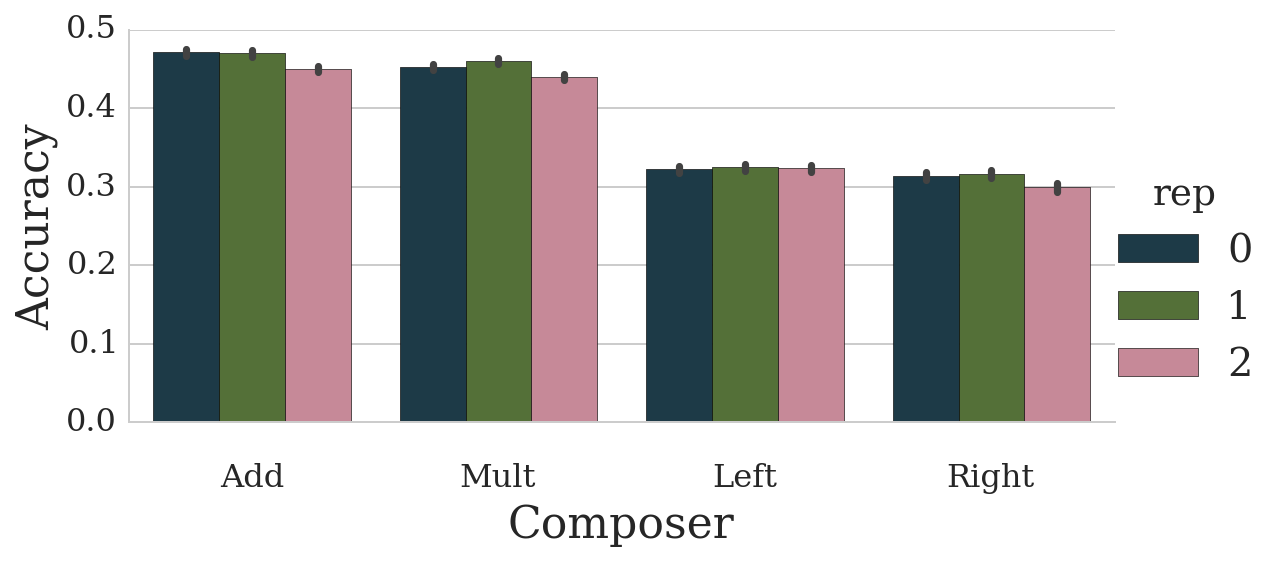

In [4]:
ids = list(chain.from_iterable(get(rep=r) for r in [0, 1, 2]))
print(ids)
df = dataframe_from_exp_ids(ids, fields_to_include={'rep':'expansions__vectors__rep',
                                                    'Composer': 'expansions__vectors__composer'})
with sns.color_palette("cubehelix", 4):
    sns.factorplot(data=df, x='Composer', y='Accuracy', hue='rep', 
                   hue_order='0 1 2'.split(), 
                   kind='bar', ci=68, aspect=2);
plt.savefig('plot-w2v_random_init_var.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

In [5]:
ids = list(chain.from_iterable(get(rep=r, composers=['Add']) for r in [0, 1, 2]))
ids

[75, 79, 83]

In [6]:
# are the differences significant
sign_df, _, _ = get_demsar_params(ids, ['expansions__vectors__rep'])
sign_df

,name1,acc1,name2,acc2,mean_diff,pval,significant
0,0,0.471414,1,0.469746,0.001668,0.802,False
1,0,0.471414,2,0.450353,0.021061,0.000,True
2,1,0.469746,2,0.450353,0.019393,0.002,True


# Repeats on R2 corpus
Does the smaller R2 dataset find differences between repeats on the a sample of approx the same size? 
### There is a difference up to 4%, but it is not significant

In [7]:
ids = list(chain.from_iterable(get(corpus='reuters21578/r8-tagged-grouped', rep=r) for r in [0, 1, 2]))
print(ids)
get_demsar_params(ids, ['expansions__vectors__rep'])[0]

[364, 365, 366]


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,0,0.665566,1,0.659196,0.006369,0.702,False
1,0,0.665566,2,0.623629,0.041937,0.012,False
2,1,0.659196,2,0.623629,0.035568,0.052,False


[75, 76, 77, 78, 71, 72, 73, 74, 296, 300, 302, 304, 297, 301, 303, 305, 298, 299]
Accuracy has 9000 values
folds has 9000 values
dice has 9000 values
Composer has 9000 values
rep has 9000 values
avg has 9000 values


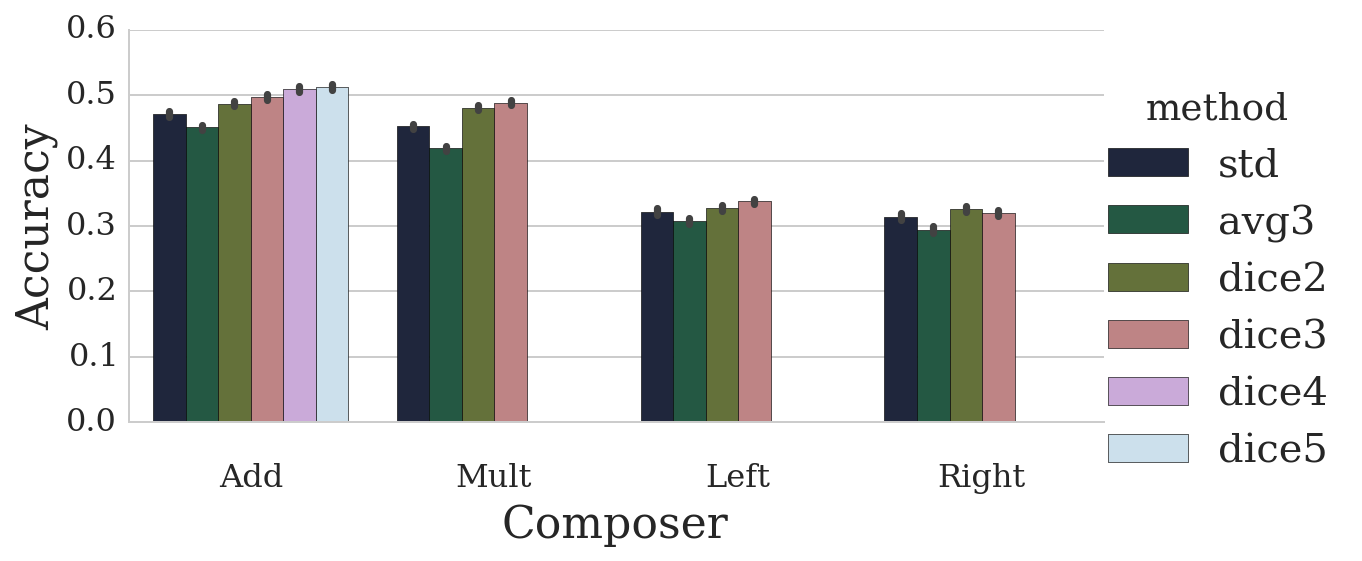

In [11]:
ids = get(rep=0) + get(rep=3, avg=True) + list(chain.from_iterable(get(rep=i, reorder=True) for i in [2,3,4,5]))
print(ids)
df = dataframe_from_exp_ids(ids, fields_to_include={'rep':'expansions__vectors__rep',
                                                    'avg':'expansions__vectors__avg',
                                                    'dice':'expansions__vectors__reorder',
                                                    'Composer': 'expansions__vectors__composer'}).convert_objects(convert_numeric=True)

df['method'] = 'avg3'
df.loc[df.rep==0, 'method'] = 'std'
for i in [2,3,4,5]:
    df.loc[(df.rep==i) & (df.dice==1), 'method'] = 'dice%d'%i
df = df.drop('avg dice rep'.split(), axis=1)
with sns.color_palette("cubehelix", 6):
    sns.factorplot(data=df, x='Composer', y='Accuracy', hue='method', 
                       kind='bar', ci=68, aspect=2);
plt.savefig('plot-w2v_random_init_boost.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Are the differences significant?

In [13]:
ids1 = [i for i in ids if Experiment.objects.get(id=i).expansions.vectors.composer=='Add']
print(ids1)
get_demsar_params(ids, ['expansions__vectors__composer', 
                        'expansions__vectors__rep'])[0]

[75, 71, 296, 297, 298, 299]


,name1,acc1,name2,acc2,mean_diff,pval,significant
0,Add-0,0.471414,Mult-0,0.452228,0.019186,0.000,True
1,Add-0,0.471414,Left-0,0.322392,0.149022,0.000,True
2,Add-0,0.471414,Right-0,0.313756,0.157658,0.000,True
3,Add-0,0.471414,Add-3,0.451337,0.020077,0.004,True
4,Add-0,0.471414,Mult-3,0.419040,0.052374,0.000,True
5,Add-0,0.471414,Left-3,0.307700,0.163714,0.000,True
6,Add-0,0.471414,Right-3,0.294694,0.176720,0.000,True
7,Add-0,0.471414,Add-2,0.487203,0.015789,0.014,False
8,Add-0,0.471414,Mult-2,0.481405,0.009992,0.088,False
9,Add-0,0.471414,Left-2,0.327719,0.143695,0.000,True


# Compare unigram vectors between multiple runs
How many of the top `n` neighbour of some entries are the same accross multiple runs

In [25]:
from glob import glob
from discoutils.thesaurus_loader import Vectors as V
from random import sample
from itertools import combinations

pattern = '/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/word2vec-wiki-15perc.unigr.strings.rep*'
files = sorted(glob(pattern))
thes = [V.from_tsv(f) for f in files]
for t in thes:
    t.init_sims(n_neighbors=100)

In [26]:
def dice(n1, n2):
    return 2 * len(set(n1) & set(n2))/ (len(n1) + len(n2))


def dice_loop(words, thes, log=False):
    dice_data = []
    for i,j in combinations(range(len(thes)), 2):
        pair_id = '%d-%r'%(i,j if j < 3 else 'A')
        if log:
            print('Doing pair', pair_id, flush=True)
        for num, word in enumerate(words):
            n1 = [x[0] for x in thes[i].get_nearest_neighbours(word)]
            n2 = [x[0] for x in thes[j].get_nearest_neighbours(word)]
            if n1 and n2:
                dice_data.append([pair_id, word, dice(n1, n2)])
    return dice_data

In [22]:
sampled_words = sample(list(thes[0].keys()), 5000)
dice_data = dice_loop(sampled_words, thes, log=True)

Doing pair 0-1
Doing pair 0-2
Doing pair 1-2


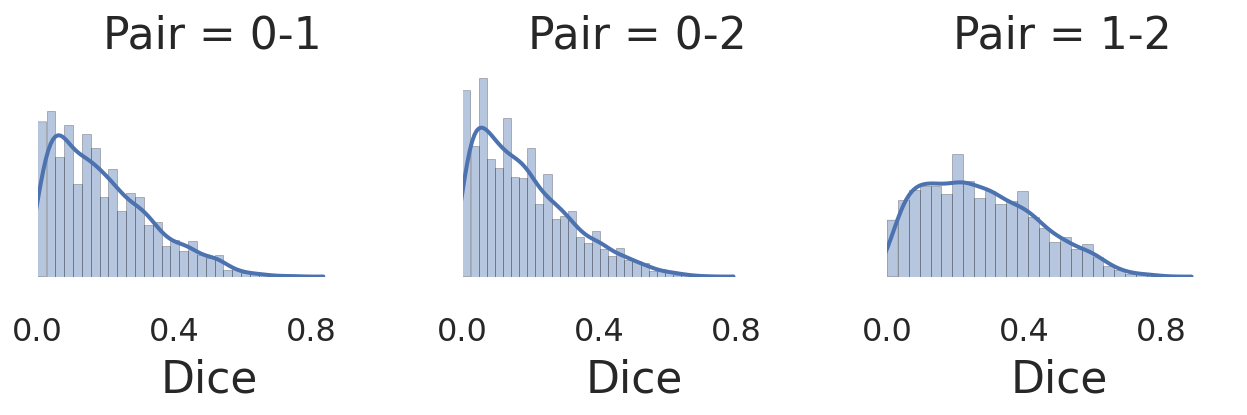

In [23]:
df3 = pd.DataFrame(dice_data, columns='Pair Word Dice'.split())
with sns.axes_style("white"):
    g = sns.FacetGrid(df3, col="Pair", col_wrap=3);
    g.map(sns.distplot, 'Dice', kde=True);

for ax in g.axes.flat:
    sparsify_axis_labels(ax)
    ax.set_xlim(0, 1.01)
    ax.set_yticklabels([])

sns.despine(left=True, bottom=True)
plt.savefig('plot-w2v_random_init_neigh_overlap.pdf', format='pdf', dpi=300, bbox_inches='tight', pad_inches=0.1)

# Observations
Neighbours tend to be quite different over multiple runs, but the overall accuracy of the classification task changes very little
# Qualitative analysis
See below
Seems to me good neighbours (which seem sensible) tend to be the same across repeated runs

In [27]:
def multiway_dice(entry, thesauri):
    df = pd.DataFrame(dice_loop([entry], thesauri), columns='Pair Word Dice'.split())
    return df.Dice.mean()

In [33]:
df = compare_neighbours(thes, [0, 1, 2, 4, 5],
                        words=['balkans/N', 'lesbian/J', 'ottawa/N', 'sneaker/N', 'essay/N', 'falsify/V', 'inborn/J'])
df['mw_dice'] = [multiway_dice(feat, thes) for feat in df.index]
df.to_csv('compare_repeated_w2v.csv')
df.sort('mw_dice')

,0,1,2,4,5,mw_dice
inborn/J,"demonstrable/J, neuropsychological/J, contrain...","posturing/N, physiologically/RB, self-percepti...","pernicious/J, nonverbal/J, uncomplicated/J, un...","internalization/N, generalised/J, flecainide/N...","psychopathy/N, paraphilia/N, internalization/N...",0.115
balkans/N,"transoxiana/N, dagestan/N, arakan/N, ostsiedlu...","cisalpine/N, interbellum/N, south-eastern/N, b...","transcaucasia/N, dodecanese/N, carpathians/UNK...","transcaucasia/N, rumelia/N, makran/N, ingria/N","dodecanese/N, bashkortostan/N, north-eastern/N...",0.176
sneaker/N,"overalls/N, pinstripe/N, sleeveless/J, necktie/N","sweatshirt/N, headband/N, chiffon/N, overalls/N","bandana/N, stiletto/N, dreadlock/N, kimono/N","sweatshirt/N, necktie/N, tights/N, leggings/N","see-through/J, kimono/N, tattered/J, pajamas/N",0.296
falsify/V,"substantiate/V, cross-examine/V, reexamine/V, ...","false/J, adduce/V, malfeasance/N, substantiate/V","rebut/V, misrepresent/V, willfully/RB, groundl...","falsified/J, adduce/V, mislead/V, retry/V","falsification/N, falsified/J, misrepresent/V, ...",0.357
ottawa/N,"montreal/N, winnipeg/N, catharines/N, toronto/N","catharines/N, oshawa/N, winnipeg/N, quebec/N","toronto/N, montreal/N, catharines/N, winnipeg/N","montreal/N, toronto/N, calgary/N, saskatoon/N","mississauga/N, toronto/N, guelph/N, winnipeg/N",0.368
lesbian/J,"gay/J, lesbian/N, transgender/J, transgendered/J","gay/J, transgender/J, bisexual/J, lgbt/N","gay/J, bisexual/J, transgender/J, lesbian/N","gay/J, transgender/J, bisexual/J, transsexual/J","gay/J, bisexual/J, lesbian/N, transgender/J",0.485
essay/N,"pamphlet/N, monograph/N, poem/N, treatise/N","book/N, pamphlet/N, monograph/N, two-volume/J","book/N, pamphlet/N, poem/N, monograph/N","book/N, monograph/N, pamphlet/N, poem/N","monograph/N, pamphlet/N, book/N, poem/N",0.650


In [34]:
print(pd.DataFrame(df.stack()).to_latex())

\begin{tabular}{lll}
\toprule
          &   &                                                  0 \\
\midrule
balkans/N & 0 &  transoxiana/N, dagestan/N, arakan/N, ostsiedlu... \\
          & 1 &  cisalpine/N, interbellum/N, south-eastern/N, b... \\
          & 2 &  transcaucasia/N, dodecanese/N, carpathians/UNK... \\
          & 4 &     transcaucasia/N, rumelia/N, makran/N, ingria/N \\
          & 5 &  dodecanese/N, bashkortostan/N, north-eastern/N... \\
          & mw\_dice &                                              0.176 \\
lesbian/J & 0 &   gay/J, lesbian/N, transgender/J, transgendered/J \\
          & 1 &           gay/J, transgender/J, bisexual/J, lgbt/N \\
          & 2 &        gay/J, bisexual/J, transgender/J, lesbian/N \\
          & 4 &    gay/J, transgender/J, bisexual/J, transsexual/J \\
          & 5 &        gay/J, bisexual/J, lesbian/N, transgender/J \\
          & mw\_dice &                                              0.485 \\
ottawa/N & 0 &    montreal/N, winnipe

In [35]:
df = compare_neighbours(thes, [0, 1, 2, 4, 5])
df.head()

,0,1,2,4,5
echolocation/N,"vocalization/N, vocalisation/N, bioluminescenc...","locomotion/N, vocalization/N, lifeform/N, vert...","well-designed/J, oscilloscope/N, anatomic/J, t...","velociraptor/N, mimic/N, baleen/N, trackball/N","multitasking/N, hallucinogen/N, mpt/N, spherom..."
outgassing/N,"vaporization/N, solidification/N, quenching/N,...",None,None,None,None
mezzo-soprano/N,"coloratura/N, contralto/N, countertenor/N, bas...","contralto/N, soprano/N, bass-baritone/N, color...","contralto/N, flautist/N, soprano/N, coloratura/N","contralto/N, bass-baritone/N, harpist/N, count...","contralto/N, bass-baritone/N, countertenor/N, ..."
carnivora/N,"eudicot/N, procellariiformes/N, conspecific/N,...","proteaceae/N, euphorbiaceae/N, ammonite/J, utr...",None,None,None
squire/N,"jorma/N, macrae/N, bostic/N, formby/N","duncan/N, wilkie/N, tyrell/N, berryman/N","donnell/N, monro/N, dashwood/N, underhill/N","frohman/N, binns/N, henshall/N, comerford/N","strutt/N, o'hagan/N, hardcastle/N, hannon/N"


In [47]:
all_feats = set.union(*[set(v.keys()) for v in thes[:3]])
len(all_feats)

83267

In [48]:
from collections import Counter
Counter(sum(f in v for v in thes[:3]) for f in all_feats)

Counter({3: 51579, 1: 18480, 2: 13208})

In [50]:
pattern = '/lustre/scratch/inf/mmb28/FeatureExtractionToolkit/word2vec_vectors/word2vec-wiki-100perc.unigr.strings.rep0'
v_avg = V.from_tsv(pattern)

In [52]:
v_avg.init_sims(n_neighbors=10)
len(v_avg)

226627

In [66]:
new_entries = set(v_avg.keys()) - set(thes[0].keys())
old_entries = set(v_avg.keys()) & set(thes[0].keys())

In [63]:
new_nouns = [x for x in new_entries if x.endswith('/N')]

In [77]:
len(new_entries), len(old_entries), len(new_nouns)

(161314, 65313, 135837)

In [73]:
new_entries

{'jungleland/N',
 'us-hus/N',
 'blithely/RB',
 'font-weight/J',
 'pipelining/N',
 'saka/UNK',
 'nearshore/N',
 'limbe/N',
 'stigmellum/N',
 'hibbard/N',
 'kanta/N',
 'gommendy/N',
 'macedo/N',
 'waymark/N',
 'nadc/N',
 'claypole/N',
 'flagiocathlete/N',
 'limber/J',
 'zarif/N',
 'kenda/N',
 'oshiro/N',
 'pedrosa/N',
 'angreal/N',
 'kilworth/N',
 "anoa'i/N",
 'montfaucon/N',
 'autologous/J',
 'dotson/N',
 'freeskiing/N',
 'wae/N',
 'premaxillary/J',
 'bartkowski/N',
 'de-stalinization/N',
 'prince-bishopric/J',
 'm-g-m/N',
 'marj/N',
 'deporte/N',
 'liberal-conservative/J',
 'luweero/N',
 'privatised/J',
 'arnsberg/N',
 'headboard/N',
 'macfarren/N',
 'gladney/N',
 'slaves/UNK',
 'stepping-stone/N',
 'add-in/N',
 'sizer/N',
 'mitsuki/N',
 'deianeira/N',
 'zerelda/N',
 'lookahead/N',
 'unionised/J',
 'rayment/N',
 'multiphoton/J',
 'zebediah/N',
 'covergirl/N',
 'zululand/N',
 'ktu/N',
 'trinamool/N',
 'klimek/N',
 'hot-button/J',
 'simo/N',
 'jassi/N',
 'azariah/N',
 'risker/N',
 'gryce

In [80]:
v_avg.get_nearest_neighbours('measured/J')

[('extravert/N', 1.2206645427572558),
 ('photoinhibition/N', 1.2268042261113046),
 ('inessential/J', 1.2355771198070054),
 ('spillover/J', 1.255496637360789),
 ('strangelet/N', 1.2661434508282658),
 ('retrogression/N', 1.2728655184461561),
 ('photoionization/N', 1.2739789904460517),
 ('self-recognition/N', 1.2808519646775918),
 ('microphysic/N', 1.2869837189422086),
 ('self-affirmation/N', 1.2886332268324958)]